In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 로지스틱 회귀

In [2]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [3]:
fish.head()

Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340

In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [5]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [6]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [7]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [10]:
fish_target=fish['Species'].to_numpy()

In [11]:
# train, test 세트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42)

In [13]:
# 표준 정규화로 데이터 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [21]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [22]:
print(lr.predict(train_bream_smelt[:5]))    # 5개까지 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [23]:
print(lr.predict)

<bound method LinearClassifierMixin.predict of LogisticRegression()>


In [24]:
lr=LogisticRegression(C=20, max_iter=1000) # # C는 규제 강도를 나타냄 (0~100),  max_iter는 solver의 반복 횟수
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [25]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [26]:
proba = lr.predict_proba(test_scaled[:5])   # 예측한 비율의 정도를 보여준다

print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [27]:
# 어디에 속할지 분류를 해주는 desicion_function
decision=lr.decision_function(test_scaled[:5])

print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [28]:
# 다중분류를 할 때 시그모이드를 쓰면 분류가 잘 안됨 -> 소프트맥스를 써야함
from scipy.special import softmax

proba =softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [29]:
# SGD 분류
# loss 값 다른 거 써도됨
from sklearn.linear_model import SGDClassifier

sc=SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

# 경사하강법으로 훈련
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [31]:
# 점진적 학습을 하고 싶을 때 partial_fit을 사용 -> 정확도 개선
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7815126050420168
0.8


In [33]:
sc=SGDClassifier(loss='log_loss', random_state=42)

train_score=[]
test_score=[]

classes=np.unique(train_target)

In [35]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

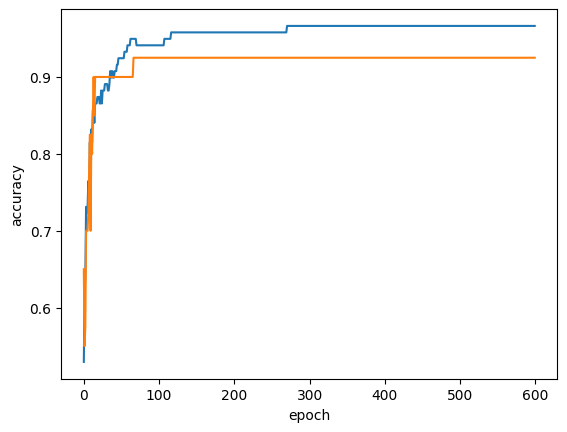

In [36]:
# 에포크 수에 따른 정확도 다름 ((최적의 에포크 값=아마도 48즈음))
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [39]:
#로그 손실, 100번 반복해서 訓練
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [40]:
# 힌지 손실
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


#### 결정트리

In [41]:
# wine 데이터 불러오기
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [42]:
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [43]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [44]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [45]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [46]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [47]:
# 표준 스케일링
ss=StandardScaler()
ss.fit(train_input)

train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [49]:
# 결정 트리 알고리즘으로 분류
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


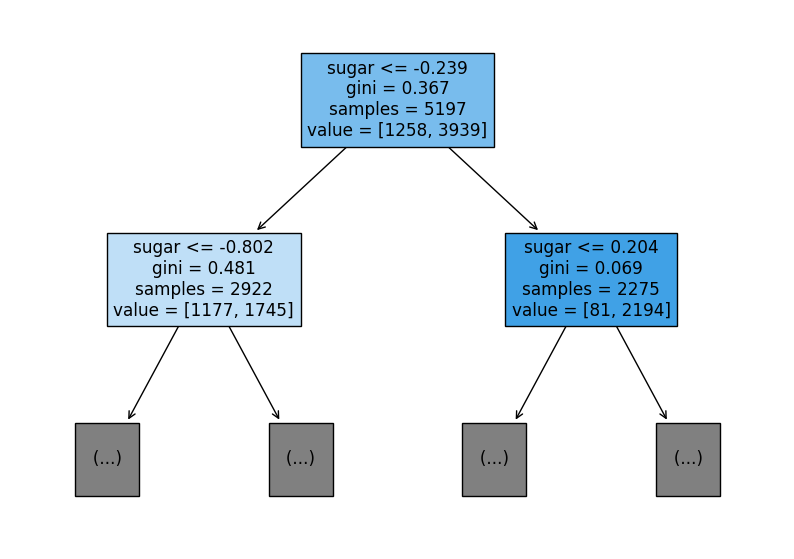

In [50]:
from sklearn.tree import plot_tree

# max_depth = 가지 수
# feature 에서 alchol이 먼저 안나오는 이유: 어떤 특성이 분류할 때 가장 알맞는 건지 불순도에 따라 가장 좋은 분류기준(feature)을 뽑아냄
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [51]:
#최대 깊이가 3인 결정트리모델을 훈련시킨다
dt=DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


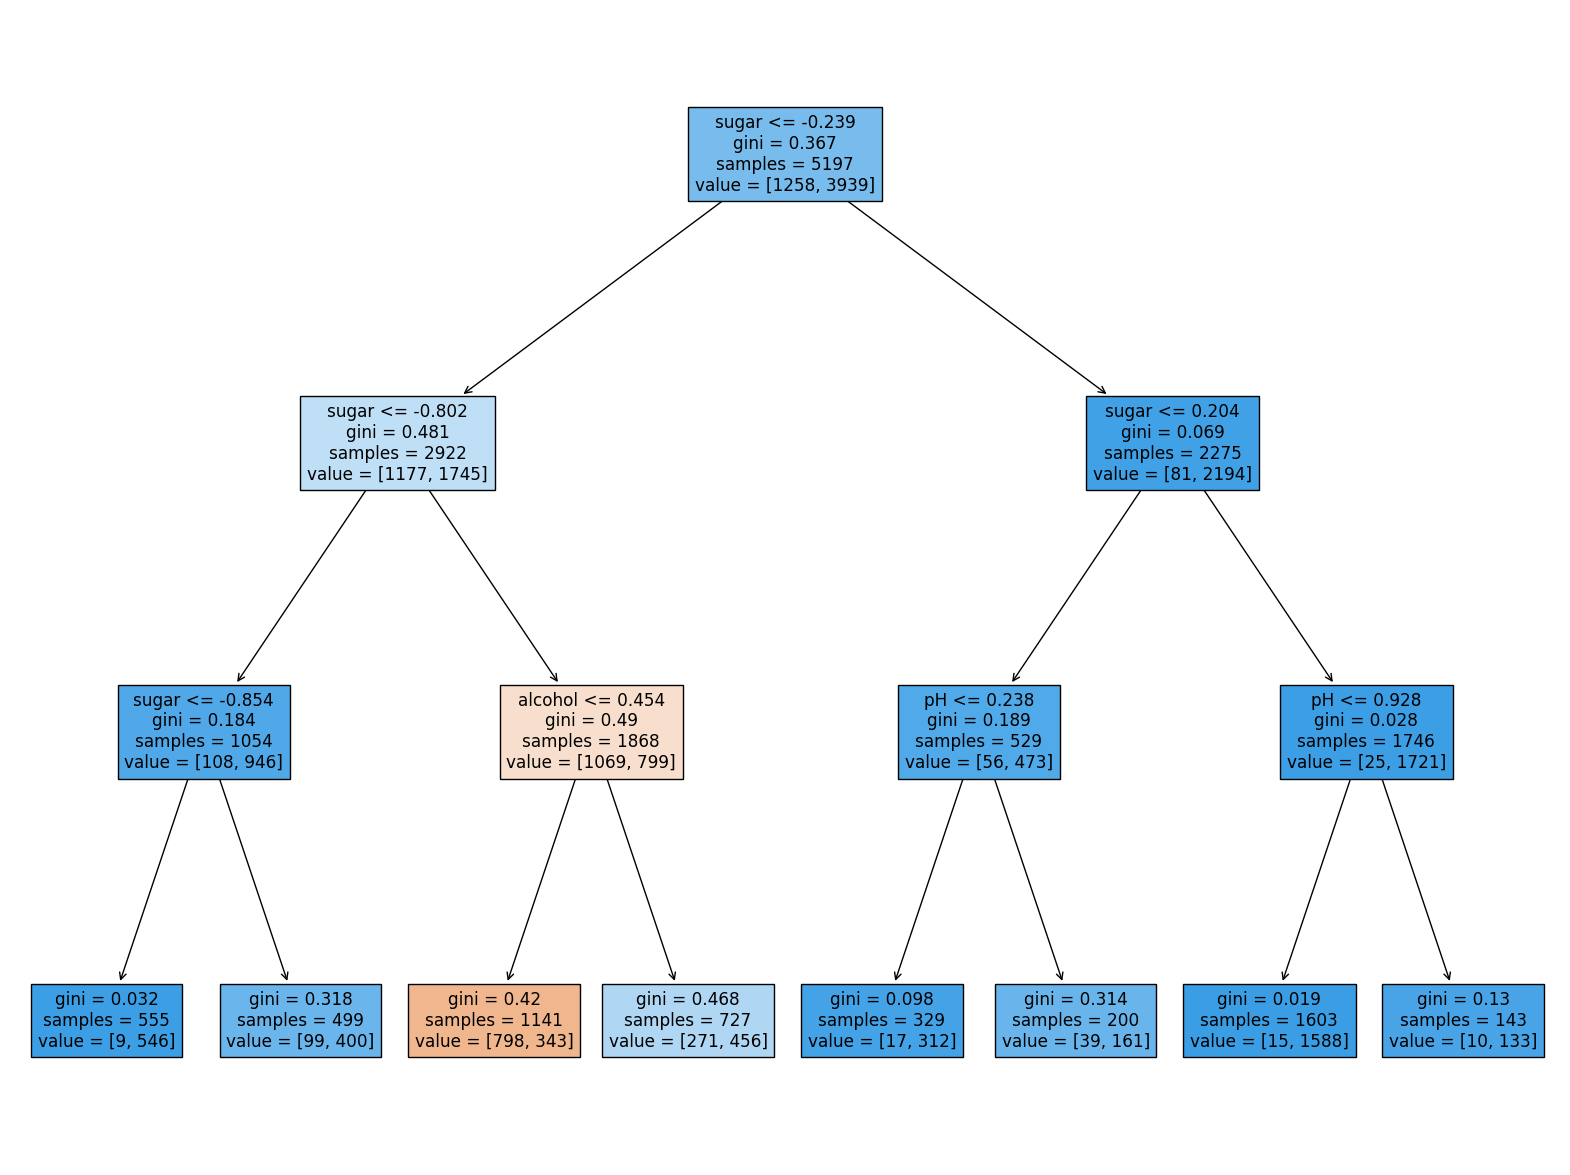

In [52]:
#깊이가 3인 결정트리의 형태를 그래프로 출력해준다
plt.figure(figsize=(20,15))

plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])

plt.show()

#### 검증 데이터

In [53]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [54]:
# 검증 세트 만들기
# 학습 -> 분류 -> 점수

In [55]:
# 훈련데이터 -> 훈련 / 검증
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [56]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [57]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

DecisionTreeClassifier(random_state=42)

In [58]:
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [59]:
# cross_validate
# 교차 검증을 뜻하는 점수 (5개씩)
from sklearn.model_selection import cross_validate

scores =cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01214671, 0.01088691, 0.01278043, 0.01339912, 0.01061916]), 'score_time': array([0.00230265, 0.00179076, 0.00182867, 0.00189257, 0.00174308]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [60]:
print(np.mean(scores['test_score']))

0.855300214703487


In [61]:
# k-fold
# 몇번 적을지 값 지정, 교차검증 몇 번 할지
from sklearn.model_selection import StratifiedKFold

scores=cross_validate(dt, train_input, train_target, cv=StratifiedKFold())

In [62]:
print(np.mean(scores['test_score']))

0.855300214703487


In [63]:
splitter=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores=cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


#### 하이퍼파라미터 서치

In [64]:
# 그리드 서치 GridSearchCV
# 파라미터 지정: 불순도 값이 높을수록 트리가 덜 복잡해진다. 오버피팅 조절 가능.
from sklearn.model_selection import GridSearchCV

In [65]:
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [66]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [67]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [68]:
dt=gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [69]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [71]:
# 파라미터 값을 범위로 입력
# 파라미터 중 가장 쓸모있는 값을 가져와 점수를 매기는 코드
# 어떤 파라미터가 가장 좋은 값인지

params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(20, 51),
          'min_samples_split': range(2,26),
          'min_samples_leaf': range(1,26),
          }

In [72]:
# 랜덤 서치 RandomizedSearchCV
# max_depth
# min_samples_split : 트리 중간(맨끝제외) 내용을 얼만큼 할지
# min_samples_leaf : 어디까지 뻗어나갈지 결정
from sklearn.model_selection import RandomizedSearchCV

rs=RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                      n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(20, 51),
                                        'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                                        'min_samples_leaf': range(1, 26),
                                        'min_samples_split': range(2, 26)},
                   random_state=42)

In [73]:
print(rs.best_params_)

{'min_samples_split': 18, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0004, 'max_depth': 39}


In [75]:
print(np.max(rs.cv_results_['mean_test_score']))    # 평균값 내주는 함수 : cv_results_

0.8685792552010069


In [76]:
dt=rs.best_estimator_

print(dt.score(test_input, test_target))

0.8592307692307692


#### 과제

for문을 이용해서 파라미터 지정. params 코드 수정

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

In [78]:
# 파라미터 코드 수정
params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

In [89]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

dt=gs.best_estimator_
print(dt.score(train_input, train_target))

0.91495093323071


In [87]:
# randint 이용
param_dist = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

In [88]:
from sklearn.model_selection import RandomizedSearchCV

rs=RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                      n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input, train_target)

dt=gs.best_estimator_
print(dt.score(train_input, train_target))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.91495093323071
